In [24]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
dd_e = dict()
dd_c = dict()

for ssp in ['ssp126', 'ssp245', 'ssp370', 'ssp585']:
    
    out_c = pd.DataFrame()
    out_e = pd.DataFrame()
    
    for rgi_reg in range(1, 20):

        rgi_reg = '{:02d}'.format(rgi_reg)

        with xr.open_dataset(f'centerlines/qc3/pcp1.6/no_match/RGI{rgi_reg}/CESM2/CESM2_{ssp}.nc') as ds:
            vol_c = ds.volume.load()

        with xr.open_dataset(f'elev_bands/qc3/pcp1.6/no_match/RGI{rgi_reg}/CESM2/CESM2_{ssp}.nc') as ds:
            vol_e = ds.volume.load()

        ok_ids= (~ vol_e.isel(time=-1).isnull()).data & (~ vol_c.isel(time=-1).isnull()).data
        vol_c = vol_c.sel(rgi_id=ok_ids).sum(dim='rgi_id')
        vol_e = vol_e.sel(rgi_id=ok_ids).sum(dim='rgi_id')
        
        out_c[rgi_reg] = vol_c
        out_e[rgi_reg] = vol_e
        
    dd_c[ssp] = out_c
    dd_e[ssp] = out_e

In [43]:
dd_e.keys()

dict_keys(['ssp126', 'ssp245', 'ssp370', 'ssp585'])

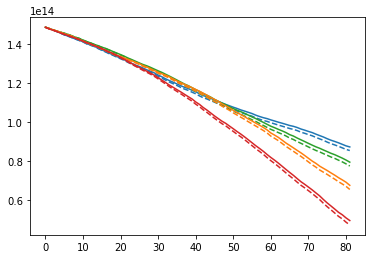

In [44]:
f, ax = plt.subplots()
colors = ['C0', 'C2', 'C1', 'C3']
for c, ssp in zip(colors, ['ssp126', 'ssp245', 'ssp370', 'ssp585']):
    out_c = dd_c[ssp]
    out_e = dd_e[ssp]
    
    out_c.sum(axis=1).plot(ax=ax, color=c);
    out_e.sum(axis=1).plot(ax=ax, color=c, linestyle='--');

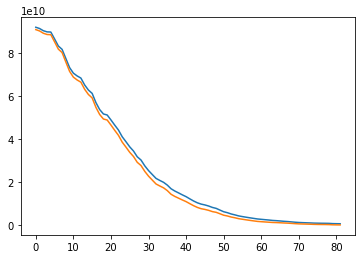

In [34]:
out_c['11'].plot();
out_e['11'].plot();

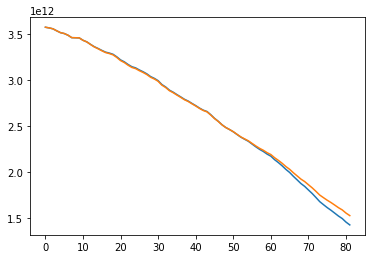

In [35]:
out_c['06'].plot();
out_e['06'].plot();

In [36]:
dd_e = dict()
dd_c = dict()

for ssp in ['ssp126', 'ssp245', 'ssp370', 'ssp585']:
    
    out_c = pd.DataFrame()
    out_e = pd.DataFrame()
    
    for rgi_reg in range(1, 20):

        rgi_reg = '{:02d}'.format(rgi_reg)

        with xr.open_dataset(f'elev_bands/qc3/pcp1.6/match_geod_pergla/RGI{rgi_reg}/CESM2/CESM2_{ssp}.nc') as ds:
            vol_c = ds.volume.load()

        with xr.open_dataset(f'elev_bands/qc3/pcp1.6/match_geod_pergla_massredis/RGI{rgi_reg}/CESM2/CESM2_{ssp}.nc') as ds:
            vol_e = ds.volume.load()

        ok_ids= (~ vol_e.isel(time=-1).isnull()).data & (~ vol_c.isel(time=-1).isnull()).data
        vol_c = vol_c.sel(rgi_id=ok_ids).sum(dim='rgi_id')
        vol_e = vol_e.sel(rgi_id=ok_ids).sum(dim='rgi_id')
        
        out_c[rgi_reg] = vol_c
        out_e[rgi_reg] = vol_e
        
    dd_c[ssp] = out_c
    dd_e[ssp] = out_e

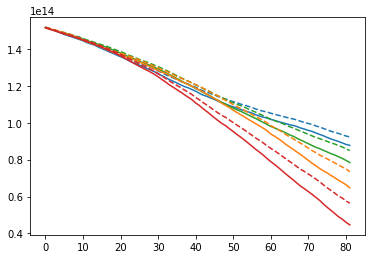

In [41]:
f, ax = plt.subplots()
colors = ['C0', 'C2', 'C1', 'C3']
for c, ssp in zip(colors, ['ssp126', 'ssp245', 'ssp370', 'ssp585']):
    out_c = dd_c[ssp]
    out_e = dd_e[ssp]
    
    out_c.sum(axis=1).plot(ax=ax, color=c);
    out_e.sum(axis=1).plot(ax=ax, color=c, linestyle='--');

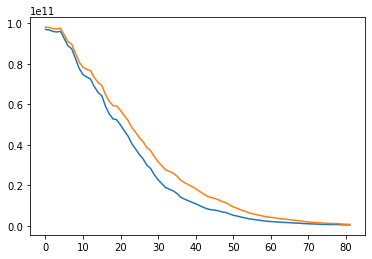

In [38]:
out_c['11'].plot();
out_e['11'].plot();

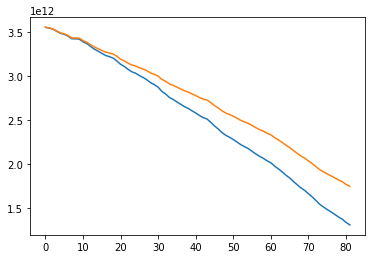

In [39]:
out_c['06'].plot();
out_e['06'].plot();